In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
import cv2
import os
from matplotlib import pyplot
import keras_cv
import keras

warnings.filterwarnings("ignore")

Using TensorFlow backend


In [2]:
task_imgs = ["training_imgs/acne-1.png", "training_imgs/alberta-1.png", "training_imgs/3-1-phillip-lim-1.png", "training_imgs/alessandra-rich-1.png",
                "training_imgs/balmain-1.png", "training_imgs/altuzarra-1.png", "training_imgs/bottega-1.png", "training_imgs/ann-demeulemeester-1.png",
                "training_imgs/burberry-1.png", "training_imgs/attico-1.png", "training_imgs/carolina-herrera-1.png", "training_imgs/bally-1.png",
                "training_imgs/blumarine-1.png", "training_imgs/chanel-1.png", "training_imgs/brandon-maxwell-1.png", "training_imgs/chloe-1.png",
                "training_imgs/bronx-and-banco-1.png", "training_imgs/christian-dior-1.png", "training_imgs/carven-1.png", "training_imgs/coach-1.png",
                "training_imgs/casablanca-1.png", "training_imgs/diesel-1.png", "training_imgs/cecilie-bahnsen-1.png", "training_imgs/dolce-gabbana-1.png",
                "training_imgs/coperni-1.png", "training_imgs/dsquared-1.png", "training_imgs/courreges-1.png", "training_imgs/elie-saab-1.png",
                "training_imgs/david-koma-1.png", "training_imgs/emporio-armani-1.png", "training_imgs/dion-lee-1.png", "training_imgs/etro-1.png",
                "training_imgs/dries-van-noten-1.png", "training_imgs/fendi-1.png", "training_imgs/erdem-1.png", "training_imgs/giambattista-valli-1.png",
                "training_imgs/ermanno-scervino-1.png", "training_imgs/giorgio-armani-1.png", "training_imgs/ferrari-1.png", "training_imgs/gcds-1.png",
                "training_imgs/givenchy-1.png", "training_imgs/gabriela-hearst-1.png", "training_imgs/hermes-1.png", "training_imgs/heliot-emil-1.png",
                "training_imgs/isabel-marant-1.png", "training_imgs/j-w-anderson-1.png", "training_imgs/kenzo-1.png", "training_imgs/sandy-liang-1.png",
                "training_imgs/loewe-1.png", "training_imgs/laquan-smith-1.png", "training_imgs/louis-vuitton-1.png", "training_imgs/loveshackfancy-1.png",
                "training_imgs/maison-martin-margiela-1.png", "training_imgs/missoni-1.png", "training_imgs/marni-1.png", "training_imgs/mm6-1.png",
                "training_imgs/msgm-1.png", "training_imgs/max-mara-1.png", "training_imgs/naeem-khan-1.png", "training_imgs/mcqueen-1.png",
                "training_imgs/nina-ricci-1.png", "training_imgs/michael-kors-1.png", "training_imgs/no-21-1.png", "training_imgs/miu-miu-1.png",
                "training_imgs/paco-rabanne-1.png", "training_imgs/moschino-1.png", "training_imgs/peter-do-1.png", "training_imgs/mugler-1.png",
                "training_imgs/philipp-plein-1.png", "training_imgs/prada-1.png", "training_imgs/philosophy-1.png", "training_imgs/ralph-lauren-1.png",
                "training_imgs/prabal-gurung-1.png", "training_imgs/rick-owens-1.png", "training_imgs/proenza-schouler-1.png", "training_imgs/roberto-cavalli-1.png",
                "training_imgs/rachel-comey-1.png", "training_imgs/saint-laurent-1.png", "training_imgs/sacai-1.png", "training_imgs/simone-rocha-1.png",
                "training_imgs/salvatore-ferragamo-1.png", "training_imgs/staud-1.png", "training_imgs/schiaparelli-1.png", "training_imgs/theory-1.png",
                "training_imgs/tibi-1.png", "training_imgs/stella-mccartney-1.png", "training_imgs/ulla-johnson-1.png", "training_imgs/undercover-1.png",
                "training_imgs/tods-1.png", "training_imgs/y-project-1.png", "training_imgs/tom-ford-1.png", "training_imgs/yohji-yamamoto-1.png",
                "training_imgs/tory-burch-1.png", "training_imgs/valentino-1.png", "training_imgs/versace-1.png", "training_imgs/victoria-beckham-1.png",
                "training_imgs/zimmermann-1.png"]

In [3]:
imgs_labeled_names = []
imgs_unlabeled_names = []

In [4]:
import zipfile



with zipfile.ZipFile('/content/drive/My Drive/thesis/training_imgs.zip', 'r') as zip_ref:
    for file in zip_ref.namelist():
        name = file.replace("training_imgs/", "")
        name = name.replace("__MACOSX/._", "")
        # Check condition to determine the output directory
        if file in task_imgs:
            output_directory = '/imgs_with_labels'
            imgs_labeled_names.append(name)
        else:
            output_directory = '/imgs_no_labels'
            imgs_unlabeled_names.append(name)

        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        zip_ref.extract(file, output_directory)

In [5]:
imgs_unlabeled_names = sorted(list(set(imgs_unlabeled_names)))

In [6]:
imgs_labeled_names = sorted(list(set(imgs_labeled_names)))

In [7]:
imgs_unlabeled_names = [item for item in imgs_unlabeled_names if item not in imgs_labeled_names]

In [8]:
imgs_unlabeled_names = imgs_unlabeled_names[2:]

In [9]:
for i in range(len(imgs_labeled_names)):
  imgs_labeled_names[i] = imgs_labeled_names[i].replace("-1.png", "")

In [10]:
for i in range(len(imgs_unlabeled_names)):
  imgs_unlabeled_names[i] = imgs_unlabeled_names[i].replace(".png", "")

In [11]:
len(imgs_unlabeled_names)

858

# **Create training data**


In [12]:
import glob

In [13]:
imgs_labeled = sorted(glob.glob('/imgs_with_labels/training_imgs/*.png'))
imgs_unlabeled = sorted(glob.glob('/imgs_no_labels/training_imgs/*.png'))

In [14]:

len(imgs_unlabeled)

858

In [15]:

x_labeled = np.empty((len(imgs_labeled), 640, 248, 3), dtype=np.uint8)
x_unlabeled = np.empty((len(imgs_unlabeled), 640, 248, 3), dtype=np.uint8)

for i, img in enumerate(imgs_labeled):
    outfit_img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    if outfit_img is None:
      print(f"Error: Unable to load the image at the path {img}. Check the file path and permissions.")
      continue
    else:
      outfit_img = cv2.cvtColor(outfit_img, cv2.COLOR_BGRA2RGBA)
      alpha_channel = outfit_img[:, :, 3]
      alpha_channel = alpha_channel.astype(float) / 255.0
      alpha_channel_3d = np.stack((alpha_channel,) * 3, axis=-1)
      color_channels = outfit_img[:, :, :3]

      height, width = color_channels.shape[:2]
      background = np.ones((height, width, 3), dtype=np.uint8) * 255

      foreground = cv2.multiply(alpha_channel_3d, color_channels.astype(float))
      background = cv2.multiply(1.0 - alpha_channel_3d, background.astype(float))
      blended = cv2.add(foreground, background).astype(np.uint8)
      blended = cv2.resize(blended, (248, 640))
      x_labeled[i] = blended

for i, img in enumerate(imgs_unlabeled):
    outfit_img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
    if outfit_img is None:
      print(f"Error: Unable to load the image at the path {img}. Check the file path and permissions.")
      continue
    else:
      outfit_img = cv2.cvtColor(outfit_img, cv2.COLOR_BGRA2RGBA)
      alpha_channel = outfit_img[:, :, 3]
      alpha_channel = alpha_channel.astype(float) / 255.0
      alpha_channel_3d = np.stack((alpha_channel,) * 3, axis=-1)
      color_channels = outfit_img[:, :, :3]

      height, width = color_channels.shape[:2]
      background = np.ones((height, width, 3), dtype=np.uint8) * 255

      foreground = cv2.multiply(alpha_channel_3d, color_channels.astype(float))
      background = cv2.multiply(1.0 - alpha_channel_3d, background.astype(float))
      blended = cv2.add(foreground, background).astype(np.uint8)
      blended = cv2.resize(blended, (248, 640))
      x_unlabeled[i] = blended

# **Data Augmentation**

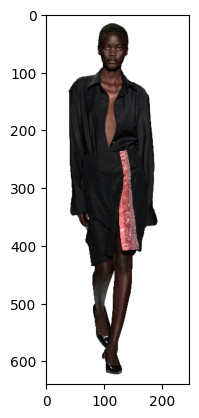

In [16]:
pyplot.imshow(x_unlabeled[0])

In [17]:
# adopted from https://keras.io/examples/vision/simsiam/ and modified according
# to the specific dataset being used here

random_flip = keras.layers.RandomFlip(mode="horizontal_and_vertical")
random_crop = keras.layers.RandomCrop(480, 248)
random_brightness = keras.layers.RandomBrightness(0.1)
random_saturation = keras_cv.layers.RandomSaturation(
    (0.49, 0.51)
)
random_zoom = keras.layers.RandomZoom((-0.2, 0.3), width_factor=None, fill_mode="constant", fill_value=255)
random_rotate = keras.layers.RandomRotation((-0.05, 0.05), fill_mode="constant", fill_value=255)

def flip_crop(image):
  image = random_flip(image)
  image = random_crop(image)
  image = tf.cast(image, tf.uint8)
  return image


def zoom_rotate(image):
    # With random crops we also apply horizontal flipping.
    image = random_zoom(image)
    image = random_rotate(image)
    image = tf.cast(image, tf.uint8)
    return image


def color_jitter(image):
    image = random_brightness(image)
    image = random_saturation(image)
    # Affine transformations can disturb the natural range of
    # RGB images, hence this is needed.
    # value smaller than 0 becomes 0 and value larger than 255 becomes 255
    # to ensure that the img is still within RGB range
    image = tf.cast(image, tf.uint8)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=255)
    return image

def random_apply(func, x, p):
    if tf.random.uniform([], minval=0, maxval=1) < p:
        return func(x)
    else:
        return x


def custom_augment(image):
    # As discussed in the SimCLR paper, the series of augmentation
    # transformations (except for random crops) need to be applied
    # randomly to impose translational invariance.
    image = flip_crop(image)
    image = random_apply(zoom_rotate, image, p=0.3)
    image = random_apply(color_jitter, image, p=0.3)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return image


In [18]:
# test augmentation
augmented_img = custom_augment(x_unlabeled[0])

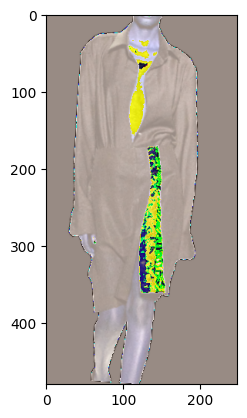

In [19]:
pyplot.imshow(augmented_img)

**Apply augmentation to the unlabeled images to create two sets of identical images**

In [20]:
x_unlabeled_one = map(custom_augment, x_unlabeled)
x_unlabeled_two = map(custom_augment, x_unlabeled)
x_unlabeled_one = list(x_unlabeled_one)
x_unlabeled_two = list(x_unlabeled_two)

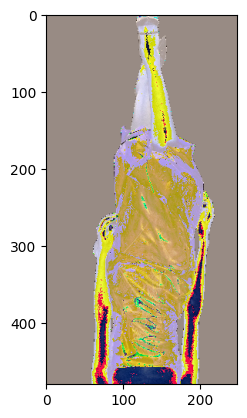

In [21]:
pyplot.imshow(x_unlabeled_one[5])

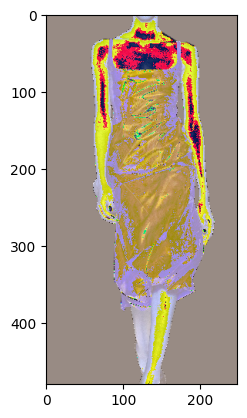

In [22]:
pyplot.imshow(x_unlabeled_two[5])

In [23]:
ssl_train_one = []
ssl_train_two = []

In [24]:
for i in range(len(x_unlabeled_one)):
  outfit_one = x_unlabeled_one[i]
  for j in range(i, len(x_unlabeled_two)):
    outfit_two = x_unlabeled_two[j]
    ssl_train_one.append(outfit_one)
    ssl_train_two.append(outfit_two)

In [25]:
len(ssl_train_two)

368511

In [26]:
np.shape(ssl_train_one[0])

TensorShape([480, 248, 3])

In [ ]:
np.save('augmentation_one.npy', ssl_train_one)
np.save('augmentation_two.npy', ssl_train_two)

In [27]:
input_one = tf.data.Dataset.from_tensor_slices(ssl_train_one[:32000])
input_two = tf.data.Dataset.from_tensor_slices(ssl_train_two[:32000])

In [28]:
input_one = (input_one
             .batch(32)
             .prefetch(tf.data.AUTOTUNE))
input_two = (input_two
             .batch(32)
             .prefetch(tf.data.AUTOTUNE))
training_inputs = tf.data.Dataset.zip((input_one, input_two))

# **Import ResNet50**

In [29]:
ResNet50 = tf.keras.applications.ResNet50(
    include_top = False,
    weights="imagenet",
    input_shape = (480, 248, 3),
    pooling = "avg"
)

In [30]:
ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 480, 248, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 486, 254, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 240, 124, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 240, 124, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

# **Use ResNet50 as backbone, and create projection head and prediction head**

In [38]:
def get_encoder():
  # Input and backbone
  inputs = keras.layers.Input((480, 248,3))
  x = ResNet50(inputs)

  # Projection head to reduce dimensionality of features extracted
  x = keras.layers.Dense(
        128, use_bias=False, kernel_regularizer=keras.regularizers.l2(0.005)
        )(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.ReLU()(x)
  x = keras.layers.Dense(
        512, use_bias=False, kernel_regularizer=keras.regularizers.l2(0.005)
      )(x)
  outputs = keras.layers.BatchNormalization()(x)
  return keras.Model(inputs, outputs, name="encoder")


In [39]:
def get_predictor():
  model = keras.Sequential(
        [
            # Note the AutoEncoder-like structure.
            keras.layers.Input((512,)),
            keras.layers.Dense(
                128,
                use_bias=False,
                kernel_regularizer=keras.regularizers.l2(0.005),
            ),
            keras.layers.ReLU(),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(512),
        ],
        name="predictor",
    )
  return model

# **Define loss function**

In [33]:
def compute_loss(p, z):
  # p stands for predictor and z stands for the encoder output (representation learned)
  z = tf.stop_gradient(z)
  difference = tf.square(p - z)
  sum_square = tf.reduce_sum(difference, axis=-1, keepdims=True)
  similarity = -sum_square
  return tf.reduce_mean(similarity)

**Define training loops**

In [34]:
class Siamese_Fashion(keras.Model):
    def __init__(self, encoder, predictor):
        super().__init__()
        self.encoder = encoder
        self.predictor = predictor
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        # Unpack the data.
        ds_one, ds_two = data

        # Forward pass through the encoder and predictor.
        with tf.GradientTape() as tape:
            # independently passed through the same encoder to produce representations z1 and z2
            # These encoded vectors should ideally capture the essential characteristics of the data that are invariant to the specific augmentations applied to each batch.
            z1, z2 = self.encoder(ds_one), self.encoder(ds_two)
            # not to recreate the original input but to transform the encoded vectors into another space where the consistency of representations can be directly compared
            p1, p2 = self.predictor(z1), self.predictor(z2)
            # Note that here we are enforcing the network to match
            # the representations of two differently augmented batches
            # of data.
            # By minimizing these cross losses, the model learns to produce representations that are robust to the specific types of variations introduced by different augmentations.
            # if the model can predict the representation of one augmented version from another, it must have learned something fundamental about the data that is not tied to any specific augmentation's peculiarities
            loss = compute_loss(p1, z2) / 2 + compute_loss(p2, z1) / 2
            # This averaging ensures that the model treats both directions of prediction equally, not biasing the learning process towards any one of the input pairs.


        # Compute gradients and update the parameters.
        learnable_params = (
            self.encoder.trainable_variables + self.predictor.trainable_variables
        )
        gradients = tape.gradient(loss, learnable_params)
        self.optimizer.apply_gradients(zip(gradients, learnable_params))

        # Monitor loss.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

# **Prepare training**

In [35]:
x_train = training_inputs.shuffle(100000)

# **Train the model**

In [40]:
num_training_samples = 32000
steps = 10 * (num_training_samples // 32)
lr_decayed_fn = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=0.03, decay_steps=steps
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor="loss", patience=5, restore_best_weights=True
)

In [41]:
model = Siamese_Fashion(get_encoder(), get_predictor())
model.compile(optimizer=keras.optimizers.SGD(lr_decayed_fn, momentum=0.6))

In [42]:
model.fit(x_train, epochs=10, callbacks=[early_stopping])

Epoch 1/10
1000/1000 [==============================] - 7083s 7s/step - loss: nan
Epoch 2/10
1000/1000 [==============================] - 6902s 7s/step - loss: nan
Epoch 3/10
1000/1000 [==============================] - 6768s 7s/step - loss: nan
Epoch 4/10
1000/1000 [==============================] - 6806s 7s/step - loss: nan
Epoch 5/10
 842/1000 [========================>.....] - ETA: 17:38 - loss: nan

KeyboardInterrupt: 

# **Fine tune using labeled inputs**

In [ ]:
file_id = "19bnHkMIH1KcTEVAjN1k8wBvBVye-8c5Q"
url = f'https://drive.google.com/uc?id={file_id}'
distance_matrix = pd.read_csv(url,index_col=0)

In [ ]:
distance_matrix

,acne,alberta,3-1-phillip-lim,alessandra-rich,balmain,altuzarra,bottega,ann-demeulemeester,burberry,attico,...,undercover,tods,y-project,tom-ford,yohji-yamamoto,tory-burch,valentino,versace,victoria-beckham,zimmermann
acne,0.000000,0.486473,0.501891,0.489143,0.488158,0.384243,0.473869,0.580992,0.473966,0.438501,...,0.477324,0.380992,0.375695,0.389745,0.451301,0.357883,0.458191,0.481126,0.455882,0.461200
alberta,0.486473,0.000000,0.408722,0.587426,0.511999,0.346787,0.498088,0.568190,0.391264,0.400004,...,0.441482,0.428712,0.417903,0.506398,0.320455,0.525117,0.424227,0.421100,0.506862,0.268555
3-1-phillip-lim,0.501891,0.408722,0.000000,0.407122,0.294217,0.406373,0.515083,0.483176,0.388480,0.418890,...,0.470944,0.494279,0.333680,0.617243,0.523842,0.411866,0.512704,0.258811,0.422956,0.296705
alessandra-rich,0.489143,0.587426,0.407122,0.000000,0.279347,0.459007,0.466155,0.423863,0.477301,0.513801,...,0.240597,0.503243,0.549418,0.503507,0.370978,0.407604,0.458141,0.492922,0.432483,0.549541
balmain,0.488158,0.511999,0.294217,0.279347,0.000000,0.492565,0.456617,0.409749,0.464121,0.481945,...,0.313706,0.393991,0.500933,0.615172,0.463917,0.324348,0.440379,0.485156,0.428845,0.401750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tory-burch,0.357883,0.525117,0.411866,0.407604,0.324348,0.456268,0.242680,0.549988,0.266644,0.486592,...,0.530190,0.377667,0.527663,0.652679,0.591796,0.000000,0.507074,0.611927,0.280761,0.642490
valentino,0.458191,0.424227,0.512704,0.458141,0.440379,0.276941,0.296247,0.320366,0.461115,0.455281,...,0.337651,0.394755,0.371894,0.371594,0.231843,0.507074,0.000000,0.582655,0.490308,0.369260
versace,0.481126,0.421100,0.258811,0.492922,0.485156,0.516970,0.654391,0.394476,0.439920,0.459772,...,0.483234,0.422631,0.370635,0.334608,0.439762,0.611927,0.582655,0.000000,0.478852,0.235079
victoria-beckham,0.455882,0.506862,0.422956,0.432483,0.428845,0.393240,0.407934,0.589282,0.449494,0.358776,...,0.438049,0.328037,0.435884,0.362418,0.364006,0.280761,0.490308,0.478852,0.000000,0.539312


In [ ]:
x_data = np.array(x_data)

In [ ]:
x_train_a = []
x_train_b = []
y_train = []
train_pairs = []

for i in np.arange(len(imgs_labeled_names_1)):
  row = imgs_labeled_names_1[i]
  col = imgs_labeled_names_2[i]
  pair = sorted([row, col])

  if pair in train_pairs:
    continue
  else:
    distance = distance_matrix.at[row, col]
    y_train.append(distance)
    index_1 = imgs_labeled_names.index(row)
    index_2 = imgs_labeled_names.index(col)
    img_1 = x_data[index_1]
    img_2 = x_data[index_2]
    train_pairs.append(pair)
    x_train_a.append(img_1)
    x_train_b.append(img_2)

0.3737919374828424


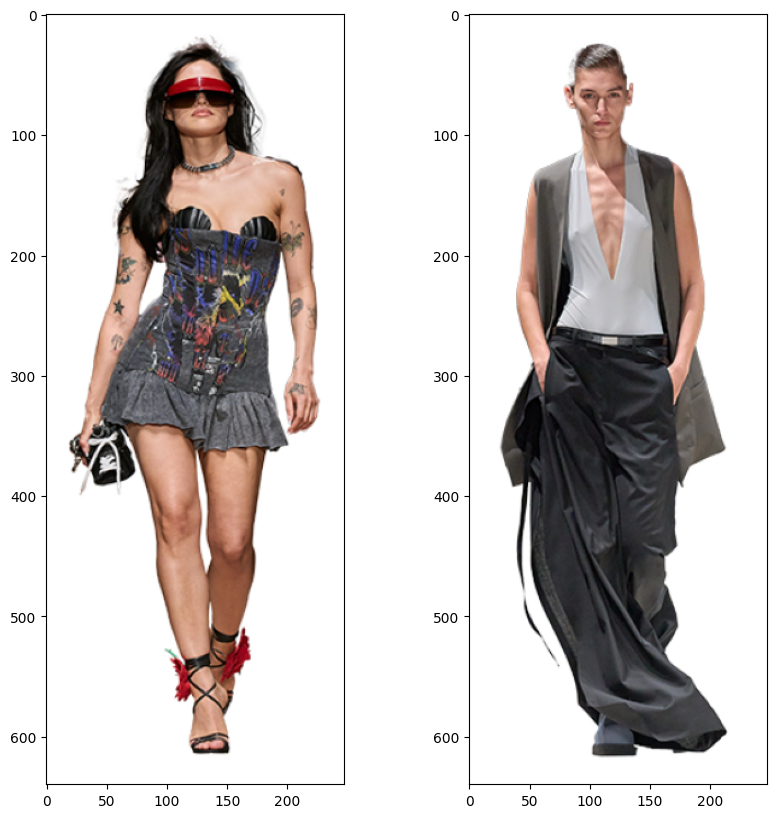

In [ ]:
fig, axes = pyplot.subplots(1, 2, figsize=(10, 10))

axes[0].imshow(x_train_a[2406])
axes[1].imshow(x_train_b[2406])
print(y_train[2406])

In [ ]:
y_train = np.array(y_train, dtype=np.float16)

In [ ]:
y_train.shape

(4656,)

In [ ]:
x_train_a_preprocessed = tf.keras.applications.resnet.preprocess_input(x_train_a_array)

In [ ]:
x_train_a_val = x_train_a_preprocessed[3000:]
x_train_a_learn = x_train_a_preprocessed[:3000]

In [ ]:
x_train_b_preprocessed = tf.keras.applications.resnet.preprocess_input(x_train_b_array)

In [ ]:
x_train_b_val = x_train_a_preprocessed[3000:]
x_train_b_learn = x_train_a_preprocessed[:3000]

In [ ]:
y_train_learn = y_train[:3000]
y_train_val = y_train[3000:]

In [ ]:
y_train_learn.shape

(3000,)

In [ ]:
model.fit(
    [x_train_a_learn, x_train_b_learn], y_train_learn,
    validation_data=([x_train_a_val, x_train_b_val], y_train_val),
    epochs = 1,
    batch_size = 24
)

125/125 [==============================] - 1161s 9s/step - loss: 0.1116 - mean_squared_error: 0.0131 - val_loss: 0.1278 - val_mean_squared_error: 0.0170


In [ ]:
model.fit(
    [x_train_a_learn, x_train_b_learn], y_train_learn,
    validation_data=([x_train_a_val, x_train_b_val], y_train_val),
    epochs = 1,
    batch_size = 24
)

125/125 [==============================] - 1121s 9s/step - loss: 0.1025 - mean_squared_error: 0.0110 - val_loss: 0.1247 - val_mean_squared_error: 0.0162


In [ ]:
model.fit(
    [x_train_a_learn, x_train_b_learn], y_train_learn,
    validation_data=([x_train_a_val, x_train_b_val], y_train_val),
    epochs = 1,
    batch_size = 24
)

125/125 [==============================] - 1153s 9s/step - loss: 0.1016 - mean_squared_error: 0.0109 - val_loss: 0.1245 - val_mean_squared_error: 0.0161
